<a href="https://www.kaggle.com/code/nipunshakya/video-game-sales-and-review-analysis?scriptVersionId=160462066" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Video Game Sales and User/Critic Review Analysis
This is my first attempt at analyzing data. Open to feedback and suggestions.

## About the Dataset
The dataset used in this analysis was inspired by Rush Kirubi (https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) who took the initial dataset scraped by Gregory Smith (https://www.kaggle.com/datasets/gregorut/videogamesales/data) and added critic and user ratings to have updated ratings of ~6,900 records. The version provided by Rush Kirubi was used for the analysis purpose. 
- The dataset contains video game sales in different region from the year 1980 till 2016. The original dataset contains a total of 16,719 rows.
- The dataset had additional user_ratings and critic_ratings score collected from Metacric for almost ~6,900 records.

## Objective of the Analysis
The available dataset provides great opportunity to analyze how video game sales have evolved over the past 4 decades in-terms of popularity, genres, sales volume, platforms and the leading publishers. The purpose is to analyze the changing trend and changing trajectory of gaming enthusiasts and gaming providers alike.

### Significance of this Analysis?
- Approximately 3.26 billion people worldwide play video games. 
- By 2025 it is estimated that the PC gaming sector will accumulate 46.7 billion US dollars.
- In 2022, gamers in the US spent 55.5 billion US dollars on games.
- Online gaming audiences will surpass 1.3 billion people by 2025.

That's a lot of people who care about games and a lot of money invested on games. This must be important for someone.

# Questions to answer

1. The trend of video game sales
2. Most popular and non-popular genre and changes over time
3. Which Platform is winning over time
4. The biggest Game Publishers
5. Top games and what makes it successful
6. Highest rated games and genre
7. Genre based analysis of games
8. Critic and User Score Analysis

## Cleaning and Analysis

Lets import all the packages that we will need for this analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#### Importing the Data

In [2]:
# Importing the csv file to start cleaning
data = pd.read_csv(('../input/videogamesales/vgsales.csv'))
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


#### Using some functions to understand the data

In [3]:
#Using .sample() to look at 5 random samples of the data. Can also use .head()/.tail()
data.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12199,World Racing,XB,2003.0,Racing,TDK Mediactive,0.05,0.01,0.00,0.00,0.07,56.0,14.0,8.1,8.0,Synetic,E
8867,Jaws Unleashed,XB,2006.0,Action,THQ,0.11,0.03,0.00,0.01,0.15,51.0,29.0,6.2,9.0,Appaloosa Interactive,M
11451,Titanfall 2,PC,2016.0,Shooter,Electronic Arts,0.03,0.04,0.00,0.01,0.08,85.0,27.0,8,488.0,Respawn Entertainment,M
9360,Ys: The Ark of Napishtim,PS2,2005.0,Role-Playing,Konami Digital Entertainment,0.07,0.05,0.00,0.02,0.13,72.0,35.0,8.8,14.0,Falcom,T
16336,Zero no Tsukaima: Maigo no Period to Ikusen no...,PS2,2008.0,Adventure,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Using .shape() to understand the dimension of the dataset
data.shape

(16719, 16)

In [5]:
# Using .info() to see the datatypes of each column and understand the missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
data.isna().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

We see a lot of missing values.. and Year has 'float' User_score has 'object' and Rating has 'object' which doesn't look right

In [7]:
# Checking if we have any duplicated data
data.duplicated().any()

False

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64


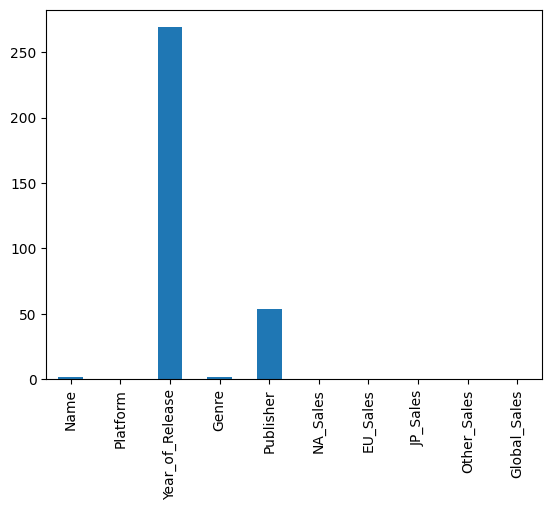

In [8]:
# Plotting the missing values (except the rating section as we know we will be missing a lot of ratings)
data.iloc[:,0:10].isna().sum().plot(kind='bar')
print(data.iloc[:,0:10].isna().sum())

In [9]:
# Let's drop rows without a name for the game. We won't be able to use those. (only 2 records)
data.dropna(subset=['Name'], inplace =True)

In [10]:
# Removing games which do not have a release year 
# (269 records, significant number, yet we do not have reliable source of data to fill the gap)
data.dropna(subset=["Year_of_Release"], inplace=True)

In [11]:
# Handling missing 'Publisher' to have 'Unknown' value
data.loc[data['Publisher'].isna()==True,['Publisher']]='Unknown'

In [12]:
data.info()
print(data.iloc[:,0:10].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16448 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       9840 non-null   object 
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.1+ MB
Name            

**_No more missing data_**

In [13]:
# Renaming the column to 'Year' for ease
data.rename(columns={'Year_of_Release':'Year'},inplace = True)

In [14]:
# Changing year to integer instead of float
data['Year']=data['Year'].apply(int)
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Removing games that have the year 2017 and 2020 (which are mistakes and are not relvant to our analysis)
data=data[~((data['Year']==2017)|(data['Year']==2020))]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16444 non-null  object 
 1   Platform      16444 non-null  object 
 2   Year          16444 non-null  int64  
 3   Genre         16444 non-null  object 
 4   Publisher     16444 non-null  object 
 5   NA_Sales      16444 non-null  float64
 6   EU_Sales      16444 non-null  float64
 7   JP_Sales      16444 non-null  float64
 8   Other_Sales   16444 non-null  float64
 9   Global_Sales  16444 non-null  float64
 10  Critic_Score  7983 non-null   float64
 11  Critic_Count  7983 non-null   float64
 12  User_Score    9839 non-null   object 
 13  User_Count    7463 non-null   float64
 14  Developer     9906 non-null   object 
 15  Rating        9768 non-null   object 
dtypes: float64(8), int64(1), object(7)
memory usage: 2.1+ MB


#### The User score does not match the user count: Becuase of 'tbd' values in User_Score

In [16]:
# Converting all the 'tbd' in User_Score to NaN to ensure analysis is not hampered on this column
data.loc[data['User_Score']=='tbd','User_Score']=np.NaN

In [17]:
# Checking the unique values in User_Score
data.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [18]:
# Fixing the data type of User_Score to be float
data['User_Score'] = pd.to_numeric(data['User_Score'], downcast="float")

#### The data looks clean to proceed further for analysis

## Data Anlaysis

In [19]:
# Looking at the descriptive statistics of top 100 sales games
pd.options.display.float_format="{:.2f}".format
sales_title=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

hundred = data.sort_values("Global_Sales",ascending=False).head(100)
hundred[sales_title].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,100.00,100.00,100.00,100.00,100.00
mean,7.00,4.22,2.05,1.31,14.59
std,5.89,3.50,2.05,1.55,9.90
min,0.66,0.01,0.00,0.08,7.39
25%,3.85,2.33,0.23,0.55,8.88
50%,5.75,3.46,1.64,0.91,11.27
75%,8.29,5.05,3.28,1.58,15.92
max,41.36,28.96,10.22,10.57,82.53


## 1) Yearly Video Games Sales

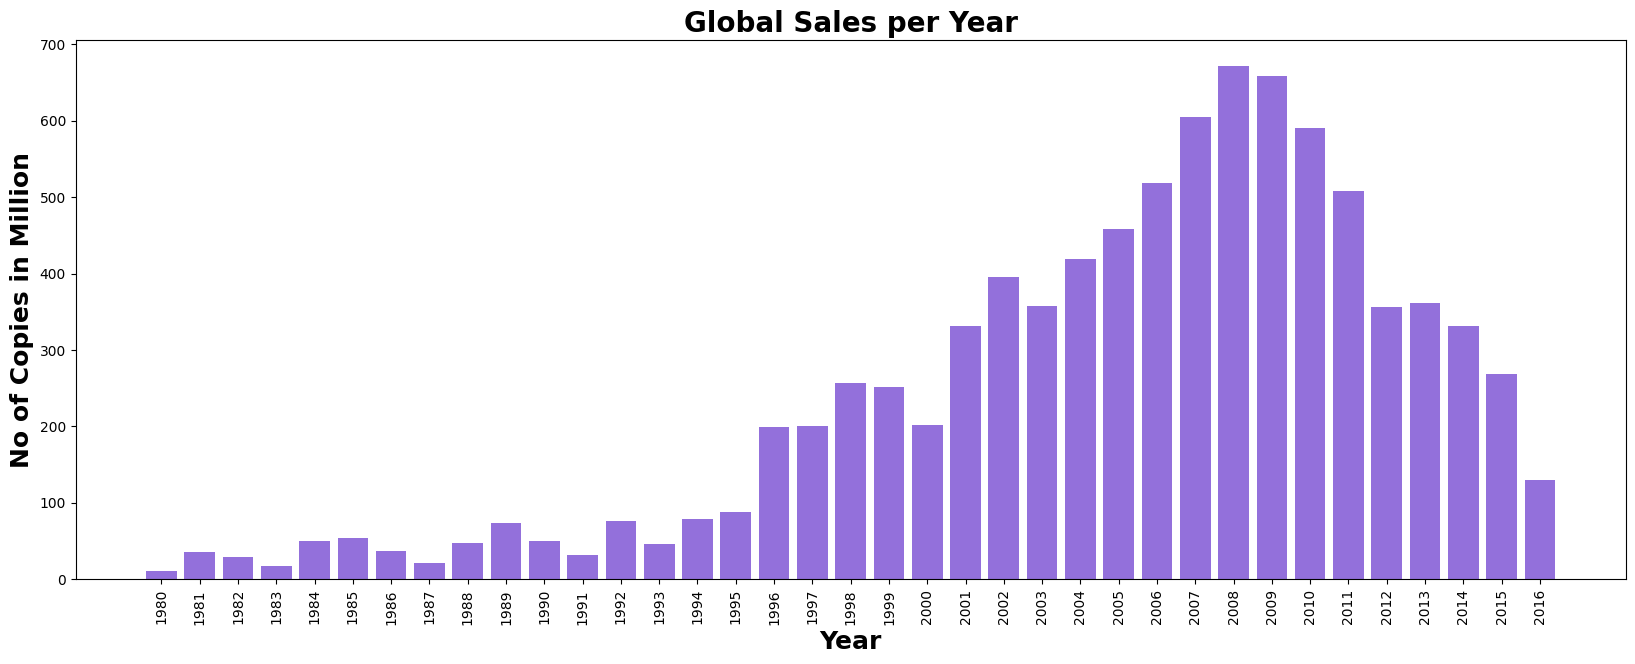

In [20]:
# Calculating yearly sales of video games
sales_yearly = data.groupby('Year')[sales_title].sum().reset_index(drop=False)

# Plotting the yearly video game sales

figsize = [20, 7]
x = sales_yearly['Year']
y = sales_yearly['Global_Sales']
width = 0.8
color = 'mediumpurple'

plt.figure(figsize=figsize)
bars = plt.bar(x, y, 
               width=width, 
               color=color)

plt.title('Global Sales per Year', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('No of Copies in Million', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(sales_yearly['Year'], rotation = 90)

plt.show()

## Disclaimer: Video game sales seem to top at 2008 - 2009 and decrease after that. It might be because of incomplete data collection ** as other resources point towards increasing trend of sales.
- For the purpose of this analysis, we will take into consideration of the data we have and try to find out any meaningful insights from it.

** The source website from which the data was scraped had stopped uploading game data to their website in the later years.

## 2) Genre of Games

In [21]:
# Calculating the total sales based on Genre of Games
genre_sales = data.groupby('Genre')[sales_title].sum().reset_index().sort_values('Global_Sales',ascending=False)
genre_sales.insert(1, 'Global_Sales', genre_sales.pop('Global_Sales'))
genre_sales

,Genre,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,1717.62,863.17,510.99,160.14,182.22
10,Sports,1310.39,671.20,371.33,134.93,132.21
8,Shooter,1041.83,584.83,314.52,38.68,103.33
7,Role-Playing,930.85,330.04,188.24,353.39,59.41
4,Platform,825.86,444.44,199.39,130.71,51.01
3,Misc,790.94,399.57,210.60,107.02,73.10
6,Racing,723.70,356.86,234.49,56.63,75.51
2,Fighting,442.63,220.51,99.00,87.28,35.87
9,Simulation,388.11,180.40,113.35,63.64,30.57
5,Puzzle,240.33,121.13,49.78,56.68,12.30


### 2.1) Composition of sales by genre

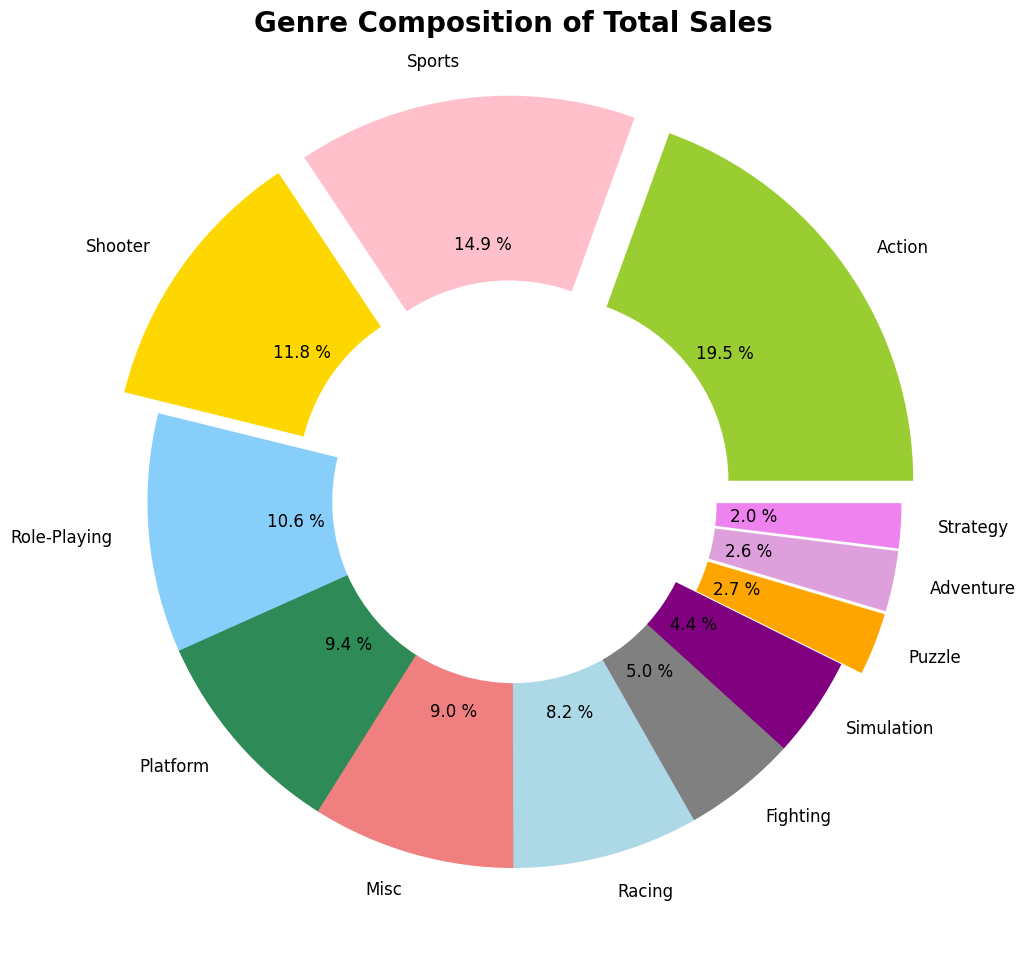

In [22]:
# Creating a list of top 3 and bot 3 genre
top3_genre=genre_sales.sort_values("Global_Sales", ascending = False).head(3)["Genre"].tolist()
bot3_genre=genre_sales.sort_values("Global_Sales", ascending = True).head(3)["Genre"].tolist()

# Plotting the composition of sales by genre
plt.figure(figsize=(12,12))

explode_list=[]
for genre in genre_sales['Genre']:
    if genre in top3_genre:
        explode_list.append(0.1)
    elif genre in bot3_genre:
        explode_list.append(0.05)
    else:
        explode_list.append(-0.01)


plt.pie(genre_sales['Global_Sales'], labels=genre_sales['Genre'], 
        colors = ['yellowgreen','pink','gold','lightskyblue','seagreen','lightcoral','lightblue',
          'grey', 'purple', 'orange','plum','violet','magenta','cyan'], 
        wedgeprops={'linewidth': 2,'width': 0.5},
       explode = explode_list,
        autopct = '%.1f %%',
        textprops = {'fontsize':12}
)
plt.title('Genre Composition of Total Sales', fontdict={'fontweight':'bold', 'fontsize':20})
plt.show()

### 2.2) Yearly Sales trend of each Genre

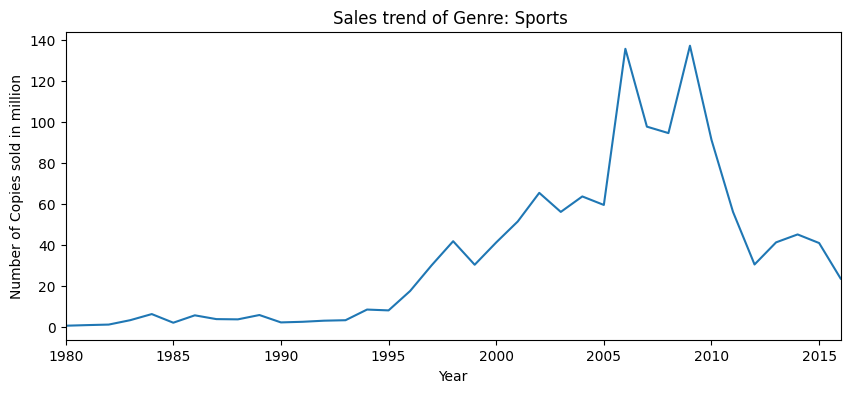

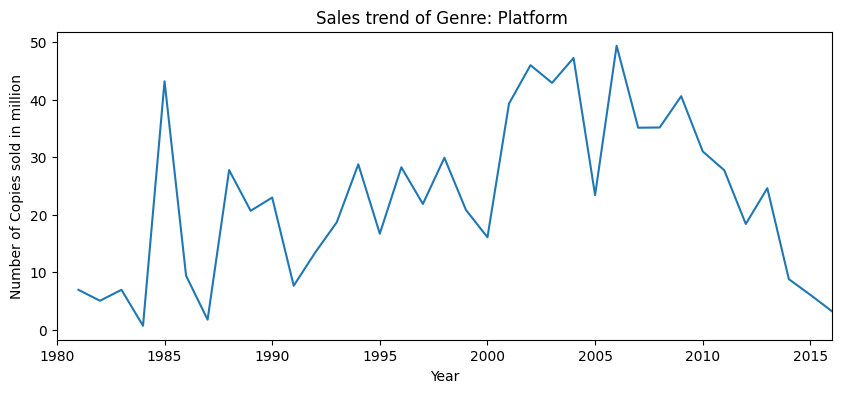

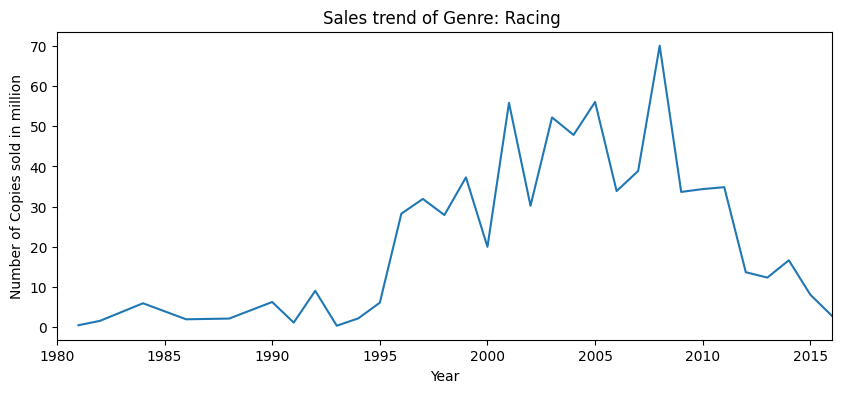

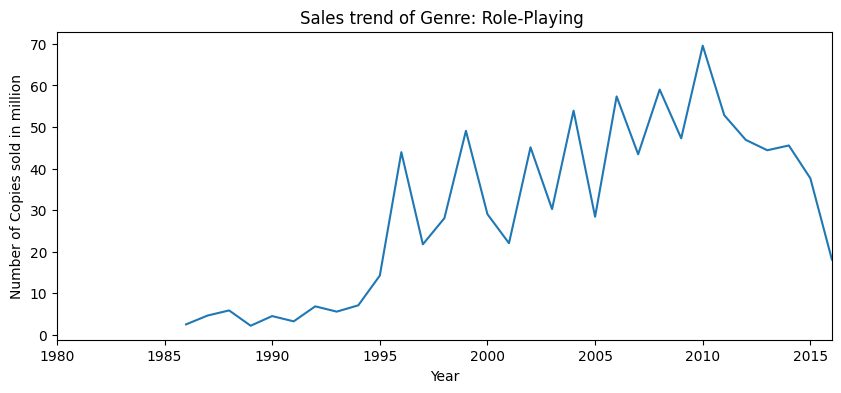

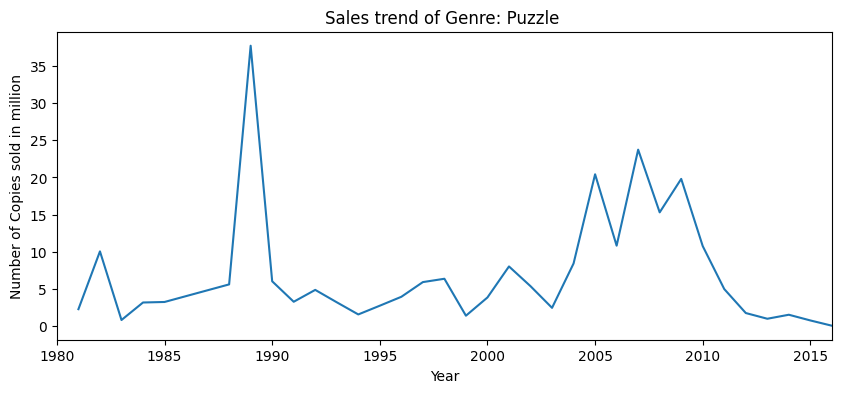

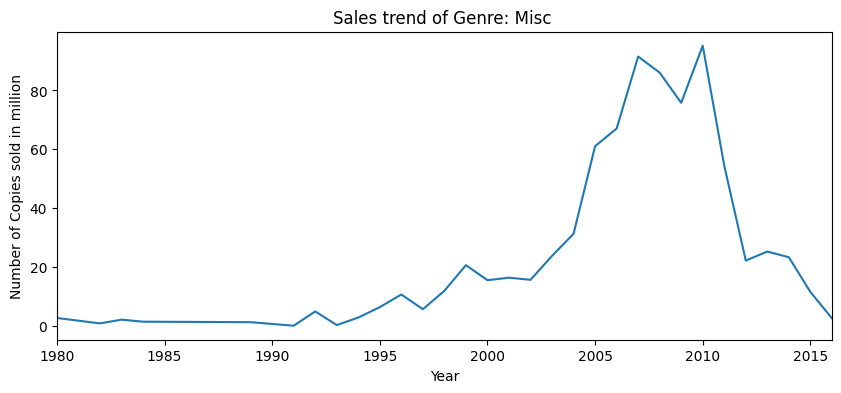

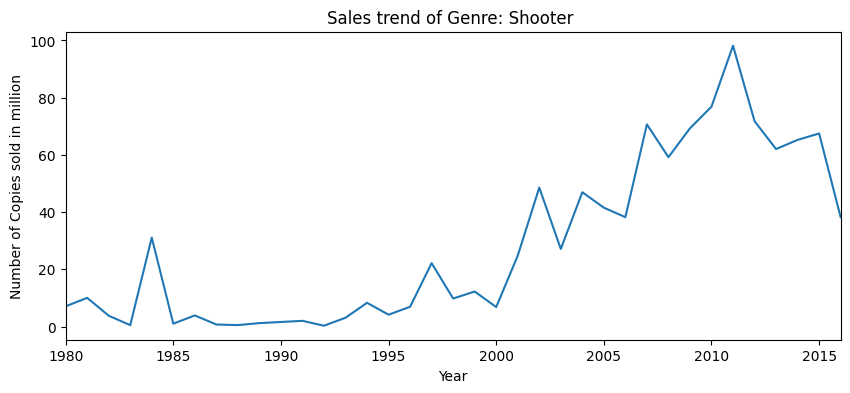

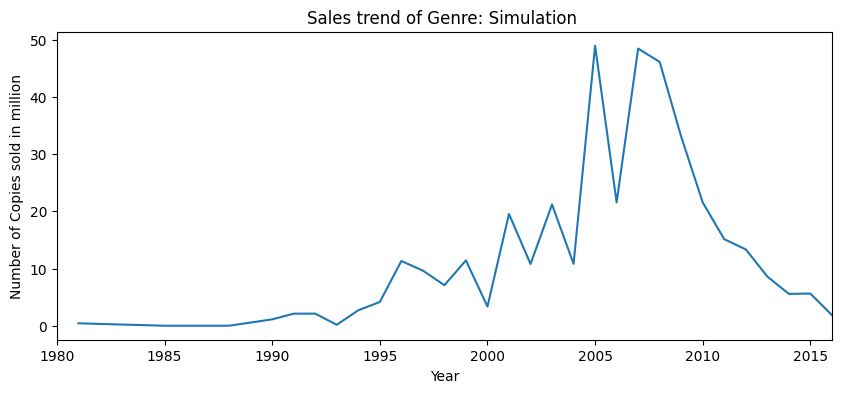

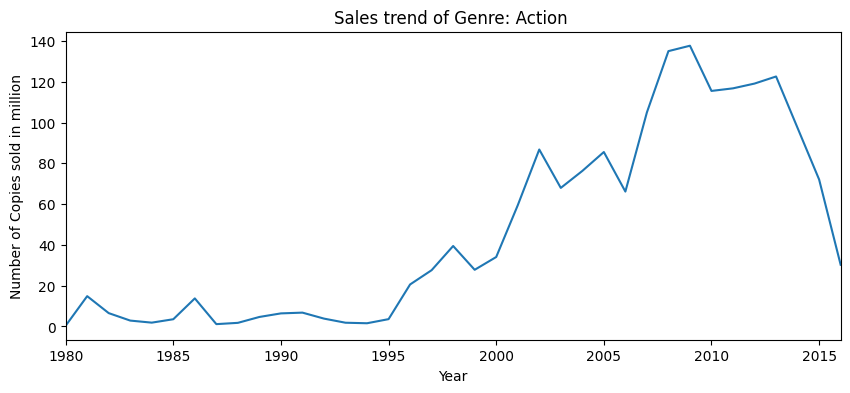

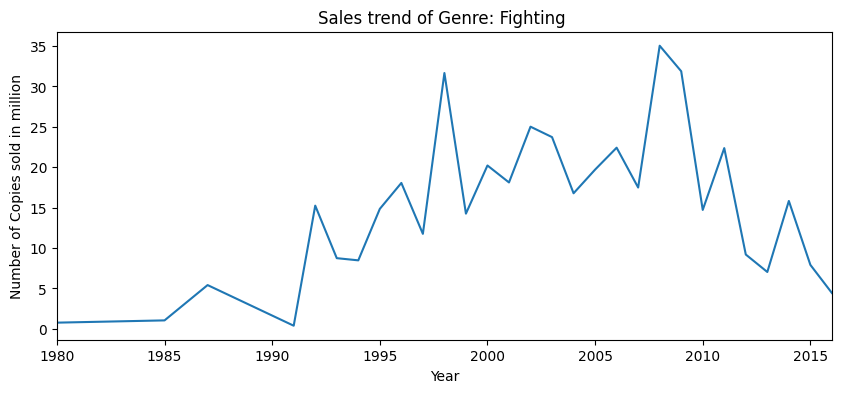

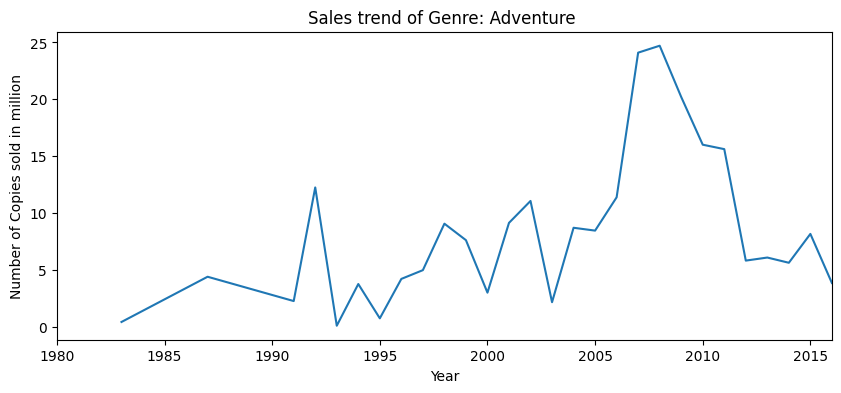

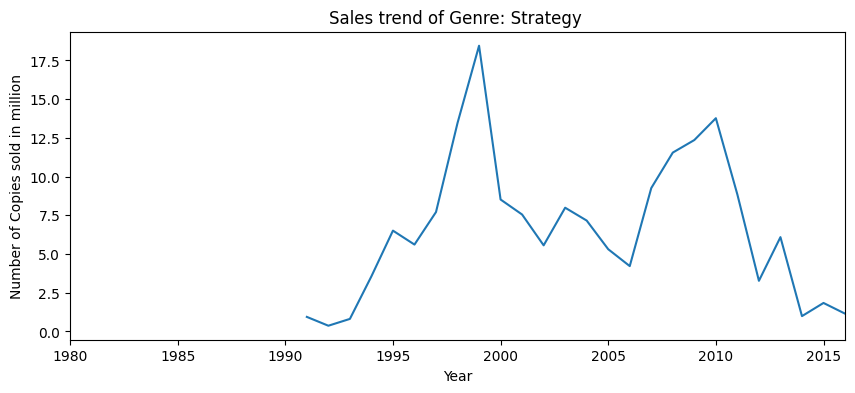

In [23]:
# List of genre
genre_list = data.Genre.unique()

# Grouping data by Genre then by Year to get yearly genre based sales

genre_trend = data.groupby(["Genre","Year"]).sum().reset_index()

# Plotting individual trend of sales for each genre

x_min = data["Year"].min()
x_max = data["Year"].max()

for i in genre_list:
    plot_data = genre_trend[genre_trend["Genre"]==i]
    plt.figure(figsize = (10,4))
    plt.plot(plot_data["Year"], plot_data["Global_Sales"])
    plt.title(f"Sales trend of Genre: {i} ")
    plt.xlabel("Year")
    plt.ylabel("Number of Copies sold in million")
    plt.xlim(x_min, x_max)
    plt.show()

## 3) Analyzing Platform based Sales

In [24]:
# Platform wise Video Game Analysis
platform_sales = data.groupby(['Platform','Year'])[sales_title].sum()
platform_sales

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform Year                                                         
2600     1980     10.59      0.67      0.00         0.12         11.38
         1981     33.40      1.96      0.00         0.32         35.77
         1982     26.92      1.65      0.00         0.31         28.86
         1983      5.44      0.34      0.00         0.06          5.83
         1984      0.26      0.01      0.00         0.00          0.27
...                 ...       ...       ...          ...           ...
XB       2008      0.13      0.04      0.00         0.01          0.18
XOne     2013     11.85      5.34      0.02         1.75         18.94
         2014     30.97     18.15      0.14         4.81         54.14
         2015     36.03     18.47      0.17         5.47         60.09
         2016     14.27      9.63      0.01         2.24         26.27

[238 rows x 5 columns]

In [25]:
vc = data['Platform'].value_counts().to_dict()
# Creating a list of platform and removing platforms that have less than 500 games
platform_list = data['Platform'].unique().tolist()
remove_list = []
for key,value in vc.items():
    if value <500:
        remove_list.append(key)
    
platform_list = [i for i in platform_list if i not in remove_list]
platform_list

['Wii',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'GBA',
 '3DS',
 'PS',
 'XB',
 'PC',
 'PSP',
 'GC']

### 3.1) Plotting sales trend for each platform

/tmp/ipykernel_20/758891626.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=platform_data, x="Year", y="Global_Sales", ci=False, ax=ax)
/tmp/ipykernel_20/758891626.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=platform_data, x="Year", y="Global_Sales", ci=False, ax=ax)
/tmp/ipykernel_20/758891626.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=platform_data, x="Year", y="Global_Sales", ci=False, ax=ax)
/tmp/ipykernel_20/758891626.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=platform_data, x="Year", y="Global_Sales", ci=False, ax=ax)
/tmp/ipykernel_20/758891626.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effe

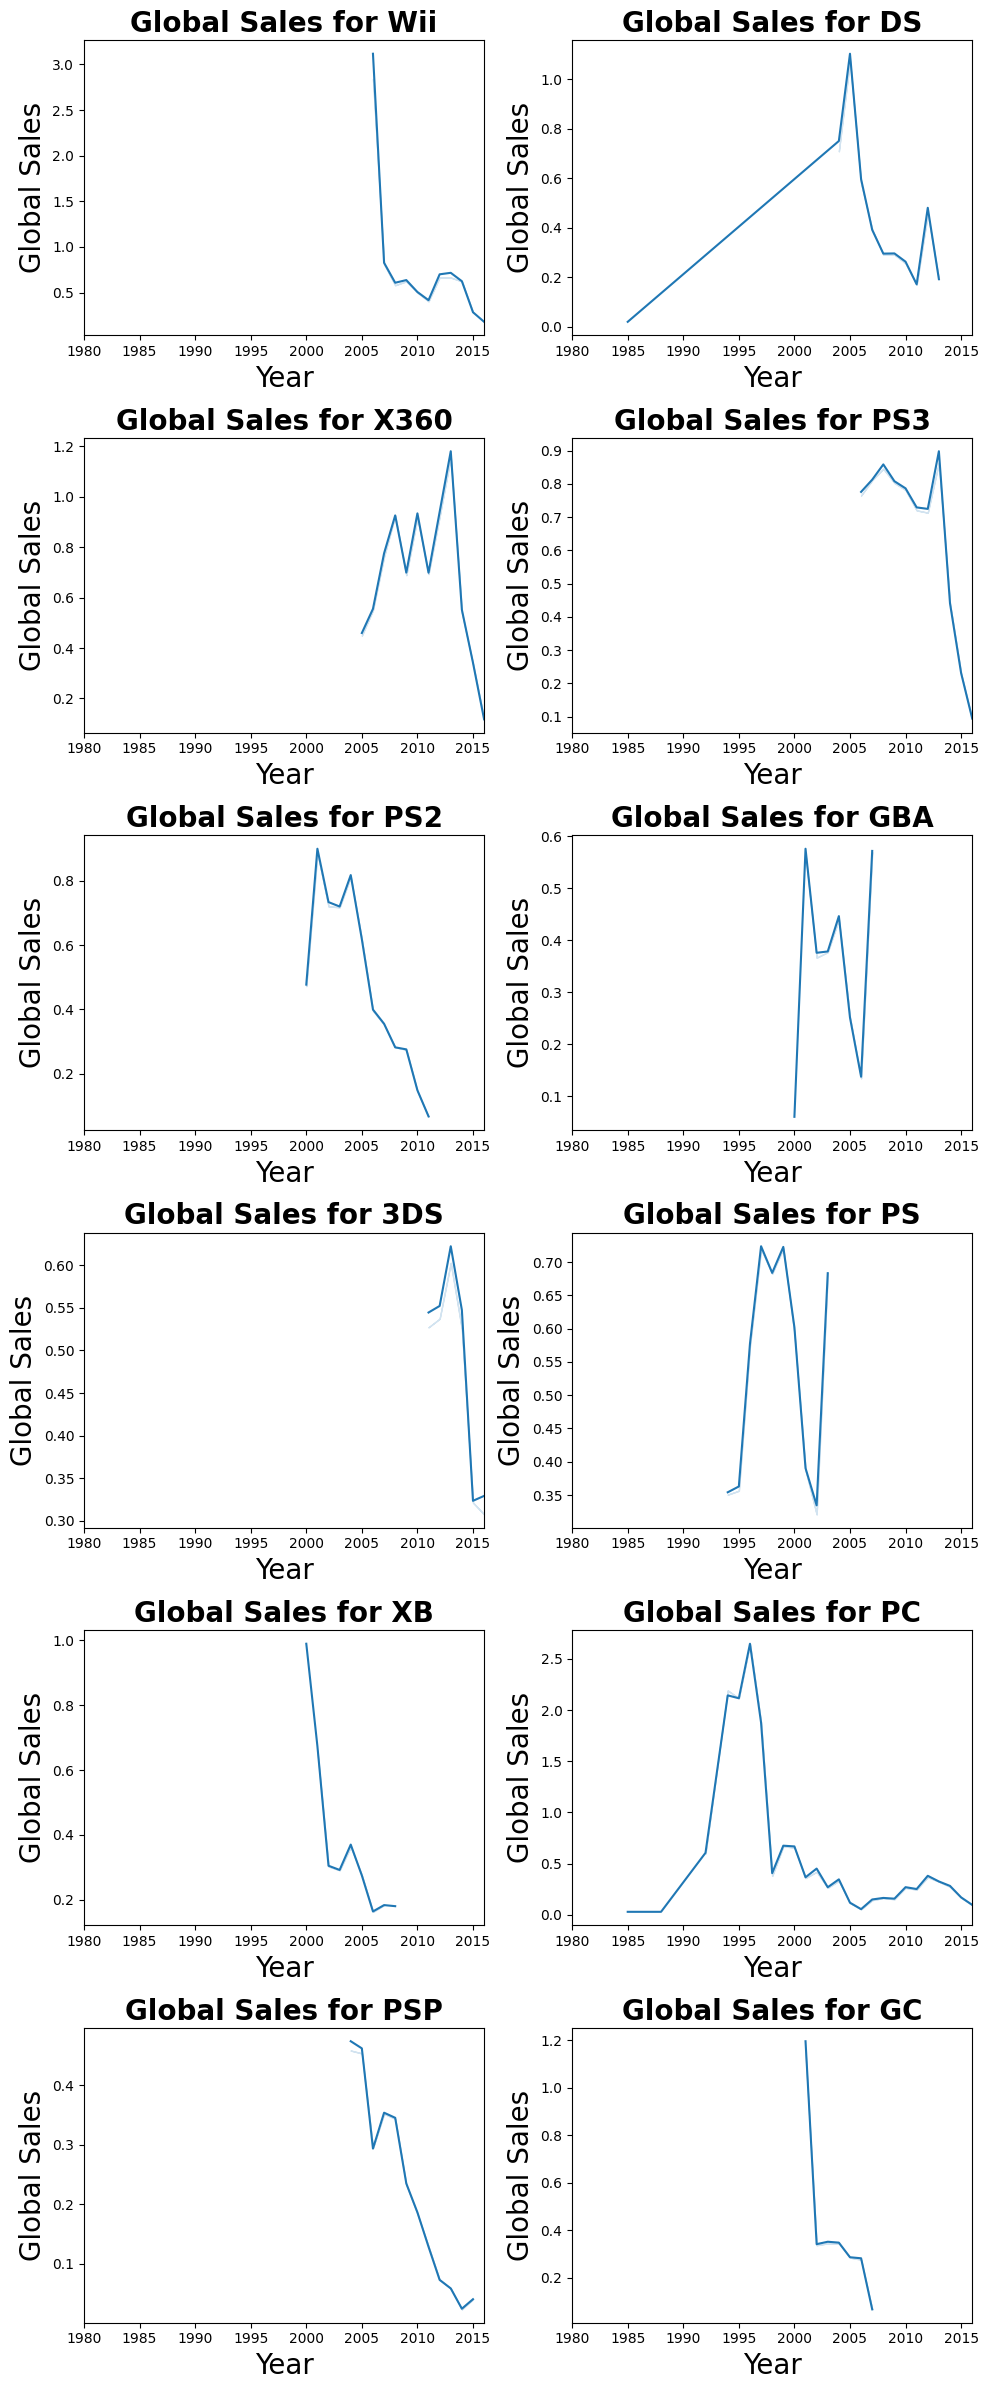

In [26]:
x_min = data["Year"].min()
x_max = data["Year"].max()

num_platforms = len(platform_list)
num_columns = 2
num_rows = (num_platforms+1)// num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for idx, platform in enumerate(platform_list):
    row = idx // num_columns
    col = idx % num_columns
    ax = axes[row, col]
    
    platform_data = data[data['Platform'] == platform]
    sns.lineplot(data=platform_data, x="Year", y="Global_Sales", ci=False, ax=ax)
    ax.set_title(f"Global Sales for {platform}", fontweight='bold',fontsize=20)
    ax.set_xlabel("Year", fontsize=20)
    ax.set_ylabel("Global Sales", fontsize=20)
    ax.set_xlim(x_min, x_max)  # Set common X-axis limits

# If there's an empty subplot, remove it
if idx + 1 < num_platforms:
    for i in range(idx + 1, num_platforms):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### 4) Analyzing Top Publishers

In [27]:
#Top 5 publishers
top_publisher=data.groupby('Publisher').sum().sort_values('Global_Sales',ascending=False).head(5).reset_index()['Publisher'].to_list()
filtered_1 = data[data['Publisher'].isin(top_publisher)]

# Calculating the Top 5 publisher's sales by Platform
platform_sales = pd.DataFrame(filtered_1.groupby(['Publisher',"Platform"])["Global_Sales"].sum().sort_values(ascending=False).reset_index())
platform_sales

,Publisher,Platform,Global_Sales
0,Nintendo,Wii,386.15
1,Nintendo,DS,345.08
2,Electronic Arts,PS2,245.96
3,Nintendo,GB,229.06
4,Sony Computer Entertainment,PS,193.73
...,...,...,...
69,Electronic Arts,WiiU,1.24
70,Ubisoft,DC,0.20
71,Ubisoft,GB,0.12
72,Activision,DC,0.10


### 4.1) Treemap of top 5 publishers and their sales based on platform

In [28]:
# Treemap of top 5 publishers and their sales based on platform

fig = px.treemap(platform_sales, path=['Publisher','Platform','Global_Sales'], values= ('Global_Sales'), title ="Global Sales by Platform for top 5 Publishers",
                 width = 1024, height = 968)

fig.show()

### 4.2) Tree map of publishers and their share of Genres

In [29]:
# Tree map of publishers and their share of Genres

genre_sales = filtered_1.groupby(['Publisher','Genre'])["Global_Sales"].sum().reset_index()

fig = px.treemap(genre_sales, path=['Publisher','Genre', 'Global_Sales'], values= ('Global_Sales'), 
                 title ="Global Sales by Platform for top 5 Publishers",
                 width = 800, height = 600)

fig.show()

### 4.3) Stacked bar plot of Genres with their corresponding share of Publishers

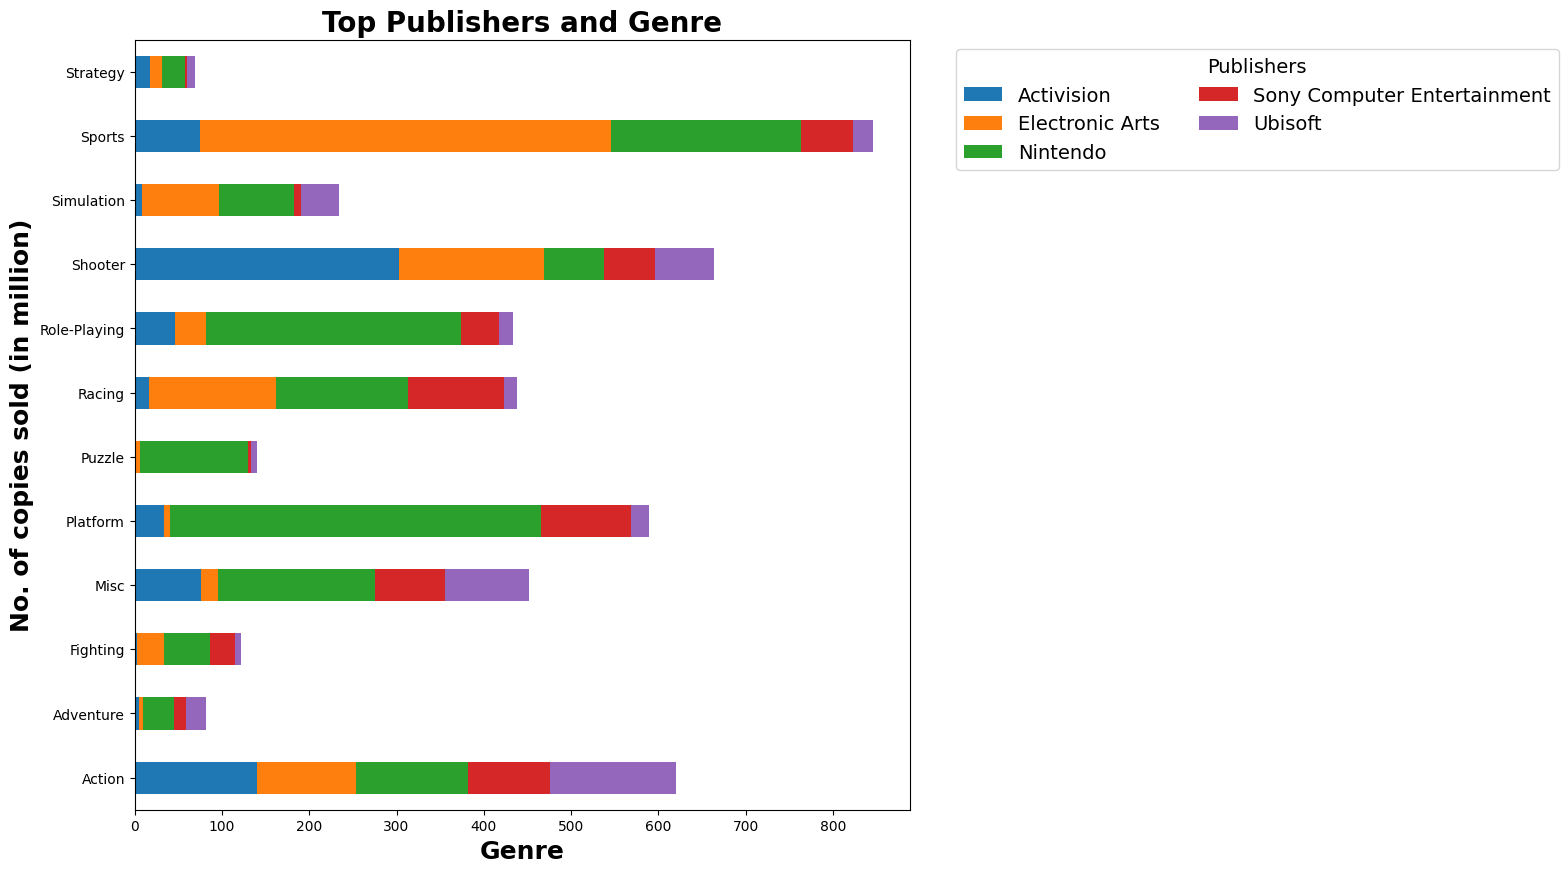

In [30]:
# Stacked bar plot of Genres with their corresponding share of Publishers

# Pivoting the dataset for stacked bar chart
pivoted_genre = genre_sales.pivot(index="Genre", columns = "Publisher", values = "Global_Sales").reset_index()

pivoted_genre.plot(x='Genre', kind = 'barh', stacked = True,figsize=(10,10))

plt.title('Top Publishers and Genre', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Genre', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('No. of copies sold (in million)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.legend(fontsize = 14, title="Publishers", title_fontsize=14, labelspacing=0.5,bbox_to_anchor=[1.85, 1], loc='upper right',ncol=2)

plt.show()

## 5) Analyzing the top sold games

### 5.1) Top sold games each year bar chart

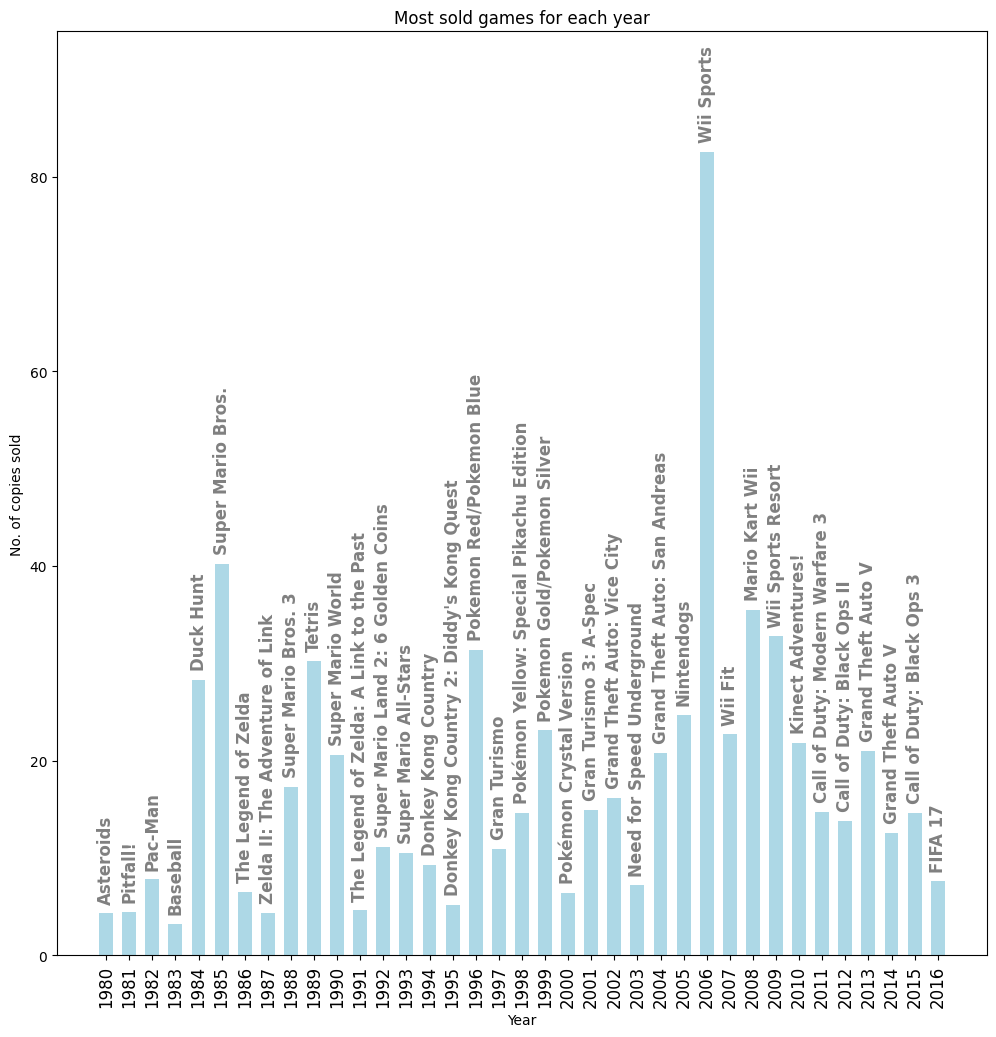

In [31]:
# Filtering top sold games for each year

idx=data.groupby("Year")["Global_Sales"].idxmax()
top_games_year = data.loc[idx]
top_games_year=top_games_year[['Year','Name','Platform','Genre','Publisher','Global_Sales']].\
sort_values('Year',ascending=True).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12,12))

x= top_games_year["Year"]
y=top_games_year["Global_Sales"]
game_name = top_games_year["Name"]

plt.bar(x,y, width = 0.6,color='lightblue')
plt.title("Most sold games for each year")
plt.xlabel("Year")
plt.ylabel("No. of copies sold")
plt.xticks(x,rotation=90, fontsize=12)

for i, (value, name, year) in enumerate(zip(y, game_name, x)):
    #plt.text(year, value, str(round(value,2)), fontsize=14, fontweight='bold', ha="center", va="bottom")
    plt.text(year, value+1, name, rotation=90, fontsize=12, ha="center",va="bottom", fontweight='bold', color='grey')

plt.ylim(0, max(y)*1.15)
plt.show()

### 5.2) Top selling games for each platform

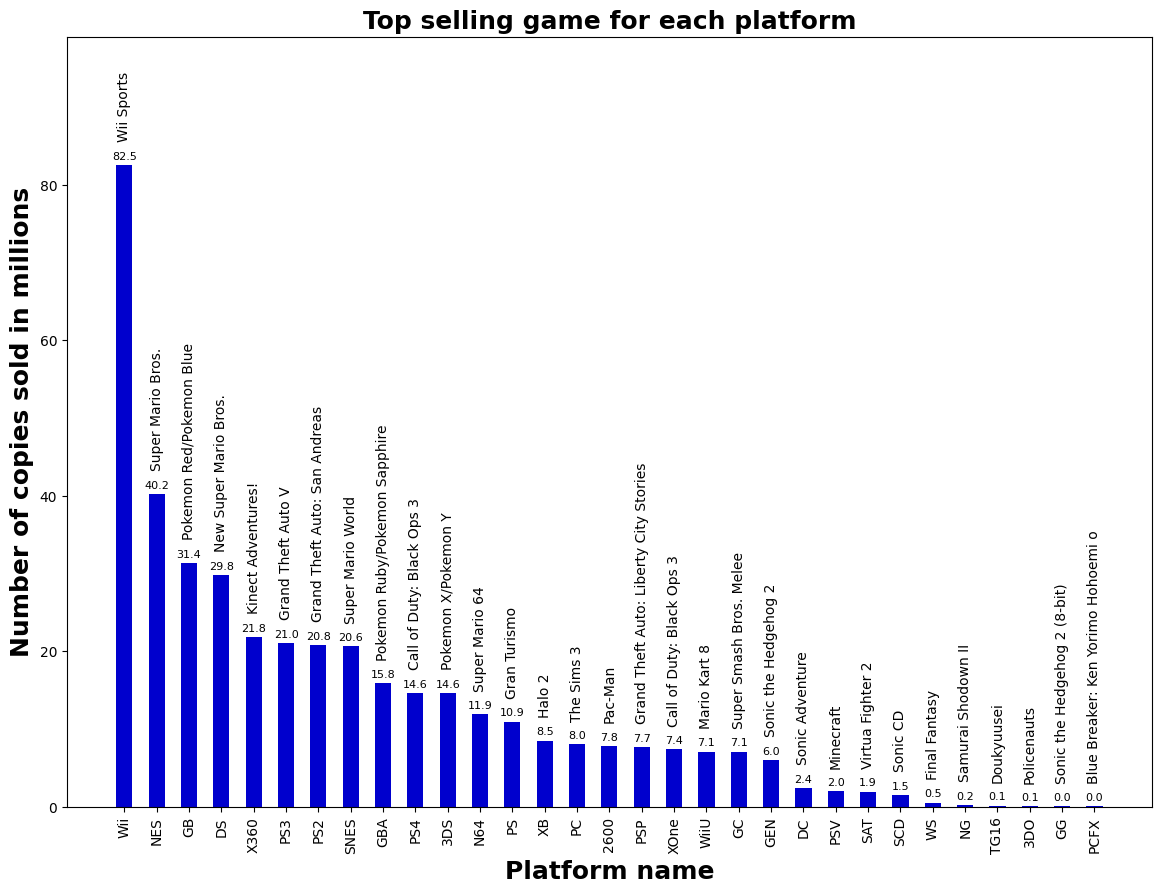

In [32]:
# Plotting the top sold games for each platform

# Filtering top selling game of all platforms
idx = data.groupby("Platform")["Global_Sales"].idxmax()
top_platform_games = data.loc[idx]
top_platform_games=top_platform_games[['Platform','Name','Year','Genre','Publisher','Global_Sales']].sort_values('Global_Sales',ascending=False).reset_index(drop=True)
plt.figure(figsize = (14,10))
x = top_platform_games["Platform"]
y = top_platform_games["Global_Sales"]
name_labels= top_platform_games["Name"]


#Plotting
plt.bar(x,y,width = 0.5, color = 'mediumblue')

plt.title("Top selling game for each platform", fontsize=18, fontweight = 'bold')
plt.xlabel("Platform name", fontsize=18, fontweight = 'bold')
plt.ylabel("Number of copies sold in millions", fontsize=18, fontweight = 'bold')
plt.xticks(rotation=90)

for i, (value,name) in enumerate(zip(y,name_labels)):
    plt.text(i, value+0.5, str(round(value, 1)), ha='center', va='bottom', fontsize = 8)
    plt.text(i, value+3, name, ha='center',rotation=-270, va='bottom',fontsize=10)

plt.ylim(0, max(y)*1.20)
plt.show()

### 5.3) Top selling game for each Genre

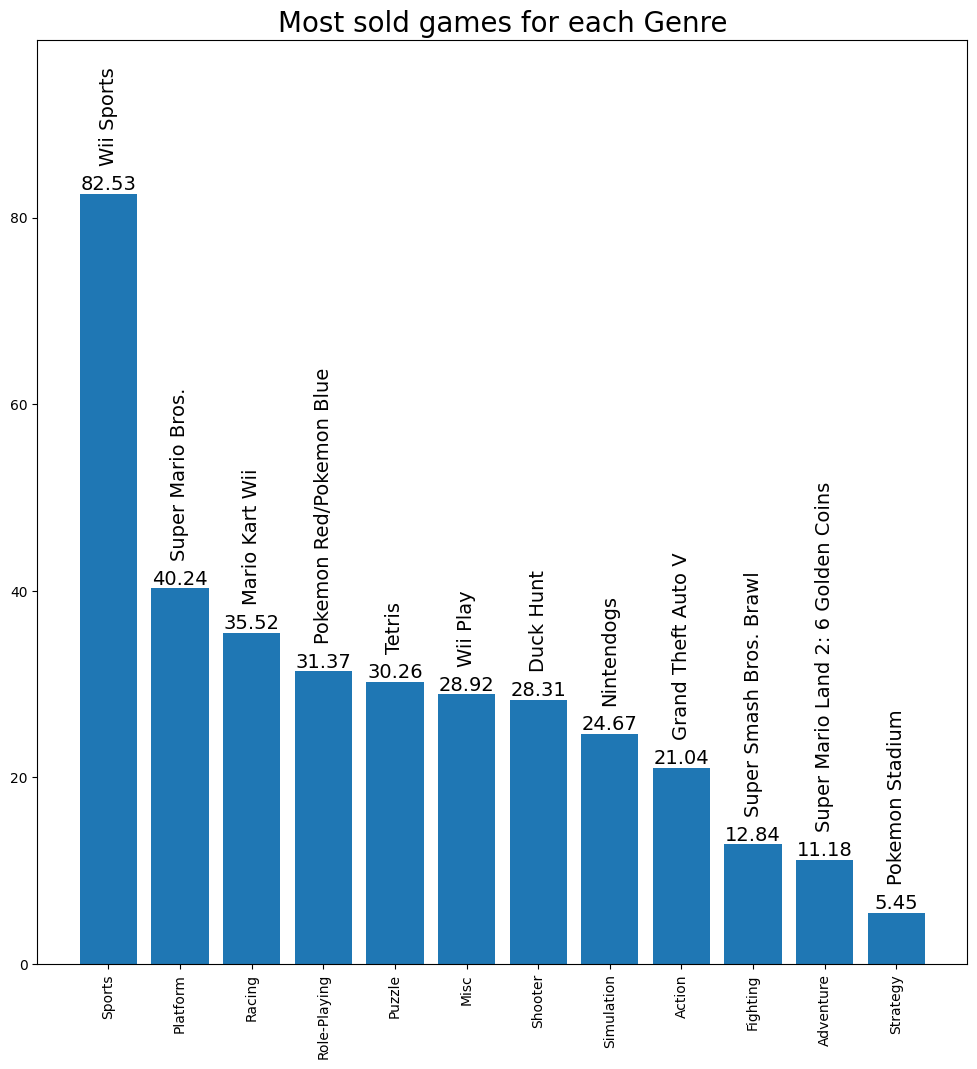

In [33]:
# Plotting the top sold games for each Genre

# Filtering top selling game for each Genre
genre_idx= data.groupby("Genre")["Global_Sales"].idxmax()
top_game_genre = data.loc[genre_idx]
top_game_genre=top_game_genre[['Genre','Name','Year','Platform','Publisher','Global_Sales']].sort_values('Global_Sales',ascending=False).reset_index(drop=True)

#Plotting
plt.figure(figsize=(12,12))
x=top_game_genre["Genre"]
y=top_game_genre["Global_Sales"]
game_names = top_game_genre["Name"]

plt.bar(x, y, width=0.8)
plt.title("Most sold games for each Genre", fontsize=20)
plt.xticks(rotation=90)

for i, (value, name) in enumerate(zip(y,game_names)):
    plt.text(i, value, str(round(value,2)) ,ha='center',va='bottom',fontsize=14)
    plt.text(i, value+3, name ,ha='center',va='bottom',fontsize=14, rotation =90)

plt.ylim(0, max(y)*1.20)
plt.show()

### 5.4) Top 10 Publisher's Highest sold games

In [34]:
#Highest sold games for top 10 publisher
# Listing top 10 publishers
top_10_pub=data.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False).head(10).reset_index()["Publisher"].to_list()

# Filtering top games sold by top 10 publishers
top_games_10_publisher= pd.DataFrame()

for i in top_10_pub:
    item = data[data['Publisher']==i].nlargest(1,'Global_Sales')
    top_games_10_publisher = pd.concat([top_games_10_publisher,item],ignore_index=True)
    
top_games_10_publisher = top_games_10_publisher[['Publisher','Name','Platform','Year','Genre','Global_Sales']]\
.sort_values('Global_Sales', ascending=False).reset_index(drop=True)
top_games_10_publisher

,Publisher,Name,Platform,Year,Genre,Global_Sales
0,Nintendo,Wii Sports,Wii,2006,Sports,82.53
1,Take-Two Interactive,Grand Theft Auto V,PS3,2013,Action,21.04
2,Sony Computer Entertainment,Gran Turismo 3: A-Spec,PS2,2001,Racing,14.98
3,Activision,Call of Duty: Modern Warfare 3,X360,2011,Shooter,14.73
4,Ubisoft,Just Dance 3,Wii,2011,Misc,10.12
5,Electronic Arts,FIFA 16,PS4,2015,Sports,8.57
6,Sega,Mario & Sonic at the Olympic Games,Wii,2007,Sports,7.99
7,Konami Digital Entertainment,Metal Gear Solid 2: Sons of Liberty,PS2,2001,Action,6.05
8,Namco Bandai Games,Namco Museum,GBA,2001,Misc,4.24
9,THQ,WWF SmackDown!,PS,2000,Fighting,3.58


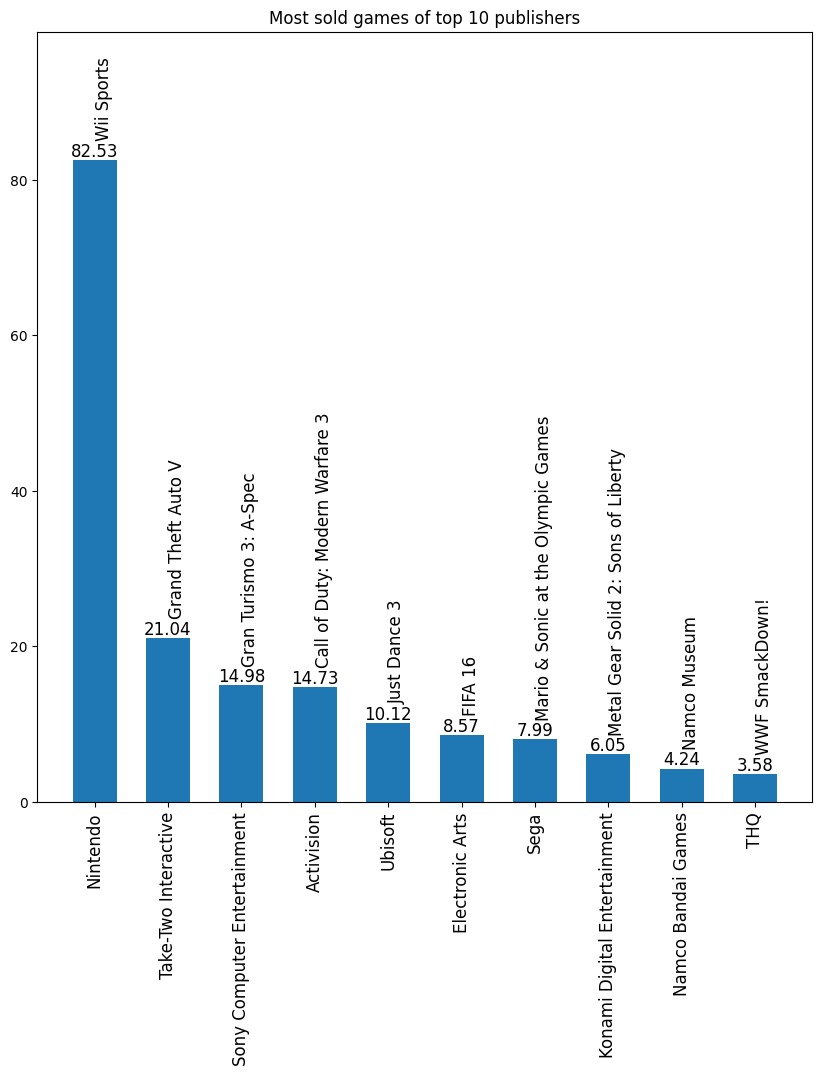

In [35]:
# Plotting the highest sold games of top 10 publishers

plt.figure(figsize=(10,10))
x=top_games_10_publisher['Publisher']
y=top_games_10_publisher['Global_Sales']
name_labels = top_games_10_publisher["Name"]

plt.bar(x, y, width = 0.6)
plt.xticks(rotation=90, fontsize=12)
plt.title("Most sold games of top 10 publishers")

for i, (value,name) in enumerate(zip(y,name_labels)):
    plt.text(i, value+.5, str(round(value,2)), fontsize=12, ha="center")
    plt.text(i, value+3, name, fontsize=12, rotation=90)

plt.ylim(0, max(y)*1.2)
plt.show()

## 6) Critics Analysis

### Some Data Cleaning again

In [36]:
# Filtering out records with no data for Critic_Score or User_Score
data2 = data[(data['Critic_Score'].notna())|data['User_Score'].notna()]

#Adding average critic score for the missing critic score
data2.loc[data2['Critic_Score'].isnull(),'Critic_Score']=data2['Critic_Score'].mean()
data2.loc[data2['Critic_Count'].isnull(),'Critic_Count']=data2['Critic_Count'].mean()

#Adding average user score for the missing user score
data2.loc[data2['User_Score'].isnull(),'User_Score']=data2['User_Score'].mean()
data2.loc[data2['User_Count'].isnull(),'User_Count']=data2['User_Count'].mean()
data2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51.00,8.00,322.00,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73.00,8.30,709.00,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73.00,8.00,192.00,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.00,65.00,8.50,431.00,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.00,41.00,6.60,129.00,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.00,12.00,5.80,43.00,Atomic Games,T
16701,Bust-A-Move 3000,GC,2003,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.00,4.00,7.13,163.02,Taito Corporation,E
16702,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.00,10.00,7.13,163.02,Interchannel-Holon,E
16706,STORM: Frontline Nation,PC,2011,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.00,12.00,7.20,13.00,SimBin,E10+


In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          8552 non-null   object 
 1   Platform      8552 non-null   object 
 2   Year          8552 non-null   int64  
 3   Genre         8552 non-null   object 
 4   Publisher     8552 non-null   object 
 5   NA_Sales      8552 non-null   float64
 6   EU_Sales      8552 non-null   float64
 7   JP_Sales      8552 non-null   float64
 8   Other_Sales   8552 non-null   float64
 9   Global_Sales  8552 non-null   float64
 10  Critic_Score  8552 non-null   float64
 11  Critic_Count  8552 non-null   float64
 12  User_Score    8552 non-null   float32
 13  User_Count    8552 non-null   float64
 14  Developer     8539 non-null   object 
 15  Rating        8456 non-null   object 
dtypes: float32(1), float64(8), int64(1), object(6)
memory usage: 1.1+ MB


### ONTO ANALYSIS!!

### 6.1) Critic Score / User Score and Genre Analysis

In [38]:
# Defining critic score above 90 and user score above 9
above_90_ctc = data2[data2['Critic_Score']>90].sort_values("Critic_Score", ascending=False)
above_90_usr = data2[data2['User_Score']>9].sort_values("User_Score", ascending=False)

#### 6.1.1) Composition of different Genre and the share of Critic Score Ratings

In [39]:
# Looking at the composition of different Genre and the share of Critic Score Ratings

fig = px.treemap(data_frame=above_90_ctc,path=['Genre','Critic_Score'],values='Global_Sales',height=800, width=800, title="Treemap of Genre and their composition of Critic Score")
fig.show()

#### 6.1.2) Composition of different Genre and the share of User Score Ratings

In [40]:
# Looking at the composition of different Genre and the share of User Score Ratings

fig = px.treemap(data_frame=above_90_usr,path=['Genre','User_Score'],values='Global_Sales',height=800, width=800, title="Treemap of Genre and their composition of User Score")
fig.show()

### 6.2) Games with high User and Critic Score

#### 6.2.1) Number of games with User Score above 9

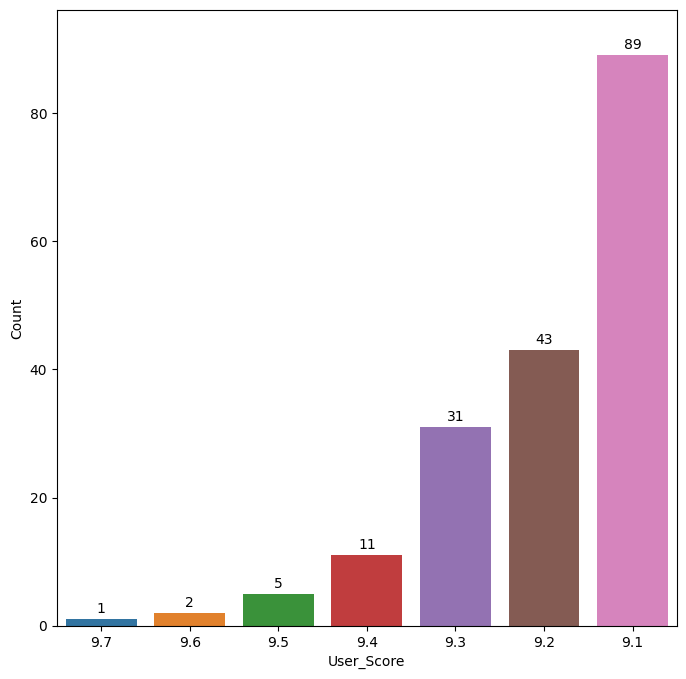

In [41]:
# Looking at the statistics with user score above 9

usrscr_count = data2[data2['User_Score']>9]['User_Score'].value_counts().reset_index()
usrscr_count.columns = ['User_Score','Count']
sorted_usr = usrscr_count.sort_values(by='User_Score', ascending = False)
sorted_usr.reset_index(inplace=True, drop=True)
sorted_usr

#Plotting the data
plt.figure(figsize=(8,8))
sorted_usr['User_Score'] = [round(x,2) for x in sorted_usr['User_Score']]
sns.barplot(data=sorted_usr, x = 'User_Score', y='Count',order=sorted_usr['User_Score'][::1])

for (i,value) in enumerate(sorted_usr['Count']):
    plt.text(i, value+0.5, value, ha='center',va='bottom')

plt.ylim(0,max(sorted_usr['Count'])*1.08)
plt.show()

#### 6.2.2) Number of games with Critic Score above 9

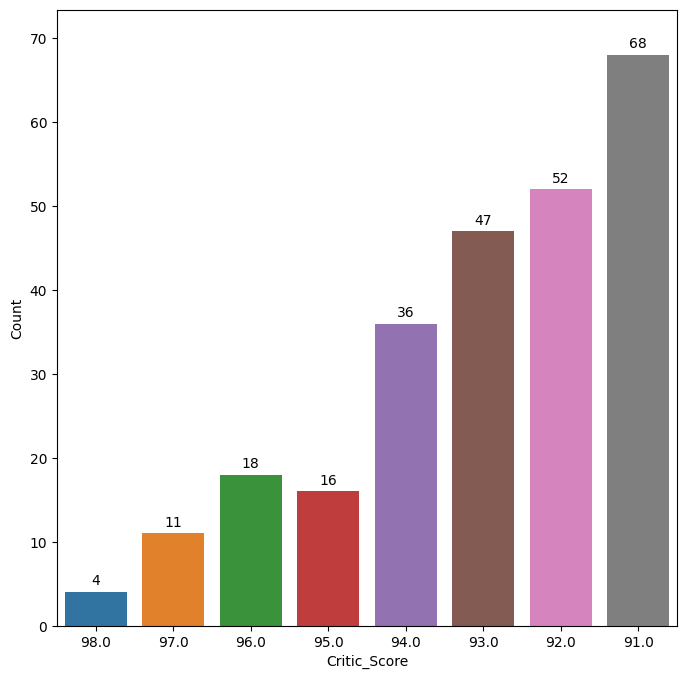

In [42]:
# Looking at the statistics with critic score above 90

ctcscr_count = data2[data2['Critic_Score']>90]['Critic_Score'].value_counts().reset_index()
ctcscr_count.columns = ['Critic_Score','Count']
sorted_critic = ctcscr_count.sort_values(by='Critic_Score', ascending=False)
sorted_critic.reset_index(drop=True, inplace=True)
sorted_critic

plt.figure(figsize=(8,8))
sorted_critic['Critic_Score'] = round(sorted_critic['Critic_Score'],2)
sns.barplot(data=sorted_critic, x = 'Critic_Score', y='Count',order=sorted_critic['Critic_Score'][::1])

for (i,value) in enumerate(sorted_critic['Count']):
    plt.text(i, value+0.5, value, ha='center',va='bottom')

plt.ylim(0,max(sorted_critic['Count'])*1.08)
plt.show()

### 6.3) User/Critic Score and Sales

#### 6.3.1) Linear regression model for Critic Score and Sales

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



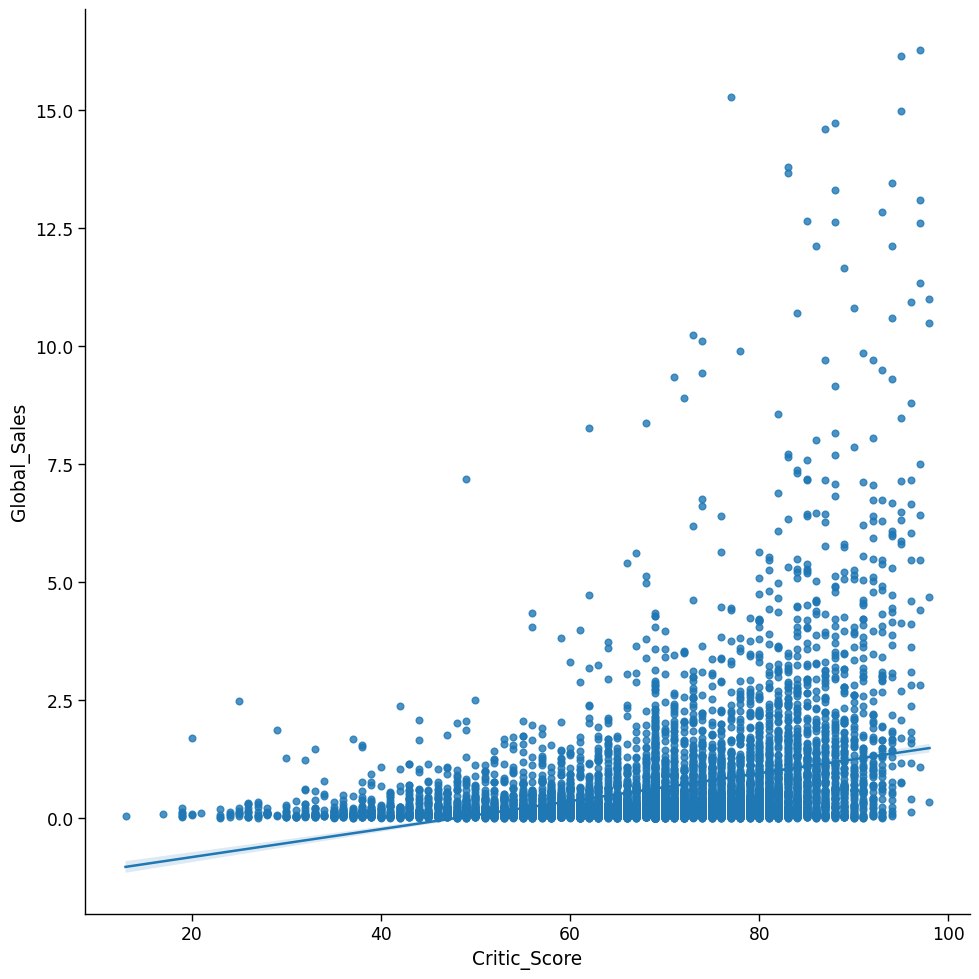

In [43]:
## Critic score and sales relationship analysis

plot_data = data2[data2['Global_Sales']<17]

sns.set_context('paper', font_scale=1.4)
sns.lmplot(data=plot_data, x= 'Critic_Score',y='Global_Sales',height=10, aspect=1)

#### 6.3.2) Linear regression model for User Score and Sales

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



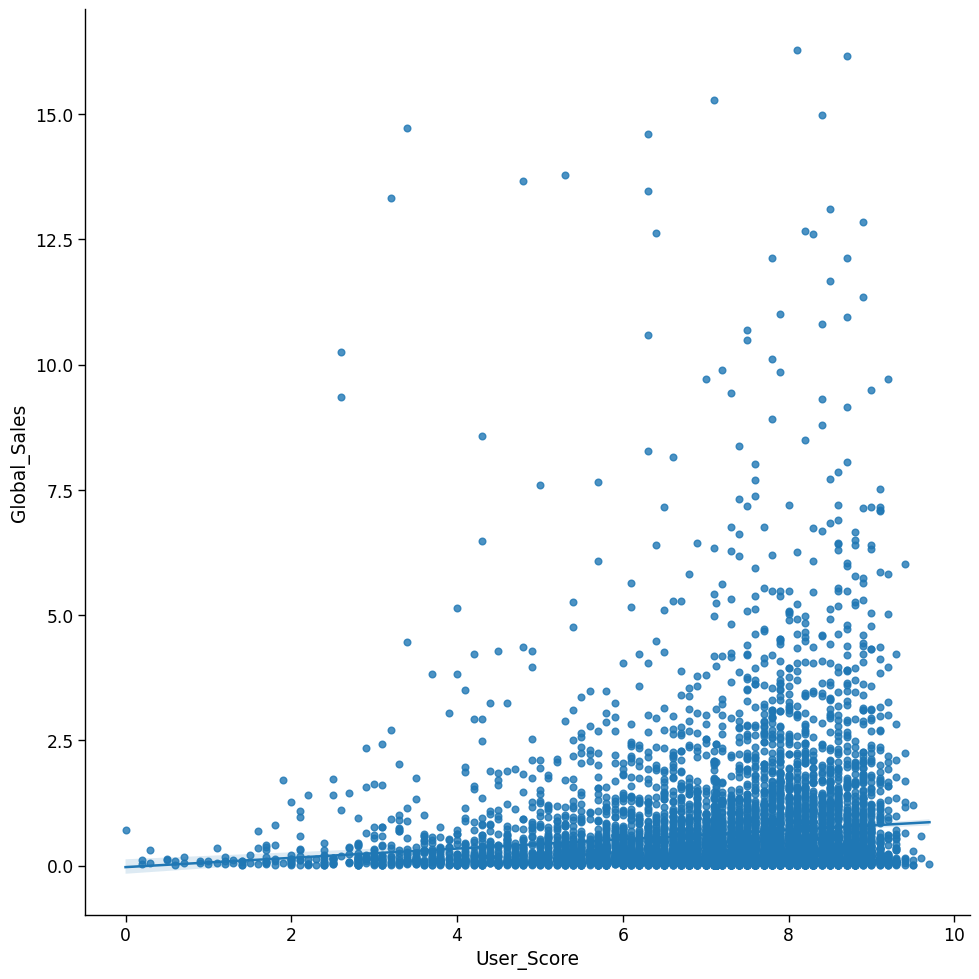

In [44]:
## User score and sales relationship analysis
plot_data=data2[data2['Global_Sales']<20]

sns.set_context('paper', font_scale=1.4)
sns.lmplot(data=plot_data, x= 'User_Score',y='Global_Sales',height=10, aspect=1)

### 6.4) Relationship between Critic Score and User Score

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



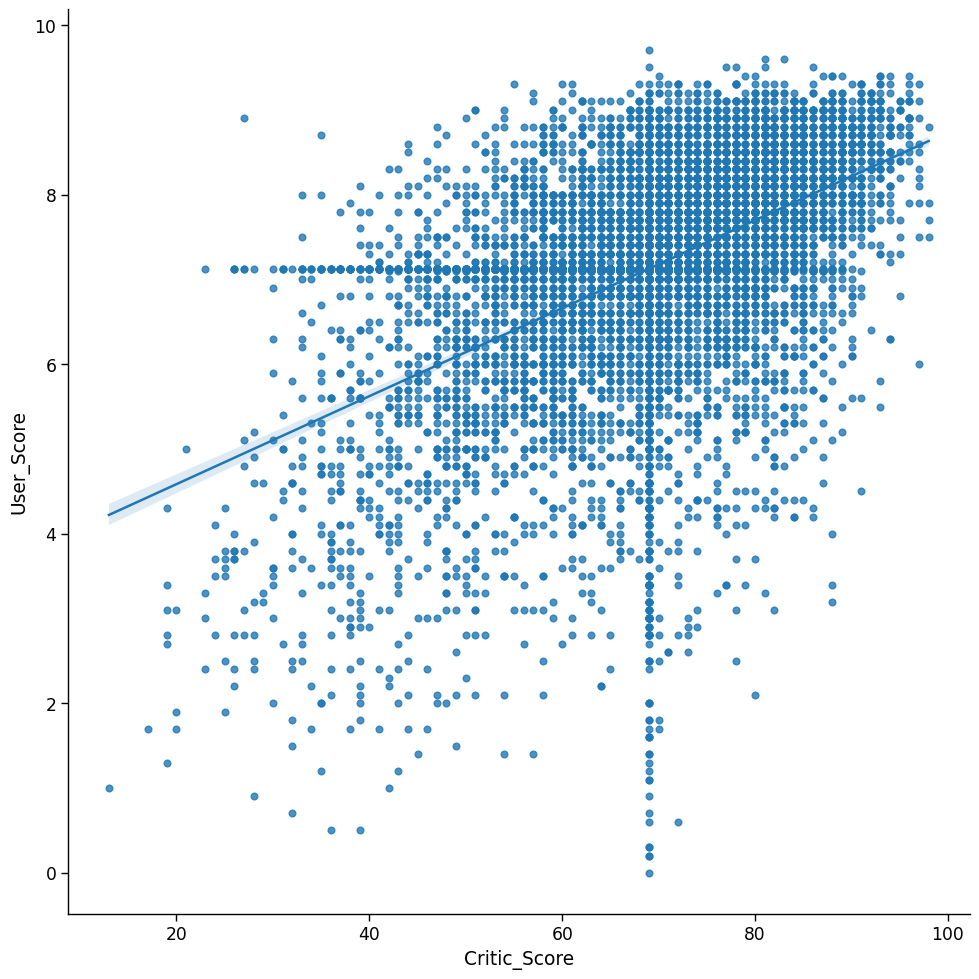

In [45]:
# Relationship between critic score and user score
sns.set_context('paper', font_scale=1.4)
sns.lmplot(data=data2, x= 'Critic_Score',y='User_Score',height=10, aspect=1)

### 6.5) The Game Awards (Awarding highest Critic/User Scores)

In [46]:
data2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51.00,8.00,322.00,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73.00,8.30,709.00,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73.00,8.00,192.00,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.00,65.00,8.50,431.00,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.00,41.00,6.60,129.00,Nintendo,E


Text(0.5, 1.0, 'Award Winners as per Critics')

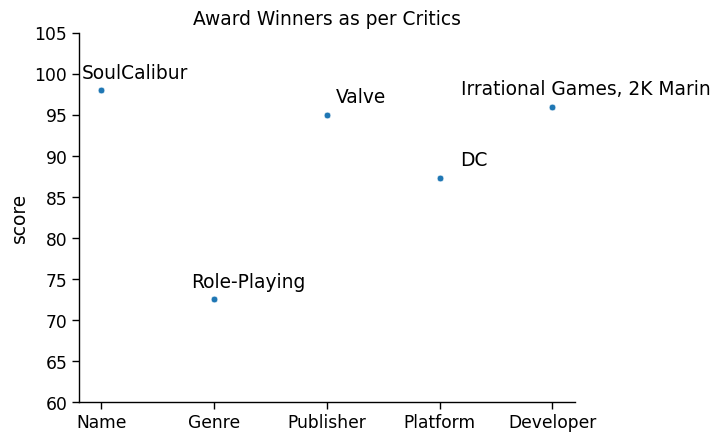

In [47]:
# Game with highest critic score
game_h_critic= data2.groupby("Name")['Critic_Score'].mean().reset_index(name='score').nlargest(1,'score')

# Genre with highest critic score
genre_h_critic= data2.groupby("Genre")['Critic_Score'].mean().reset_index(name='score').nlargest(1,'score')

# Publisher with highest critic score
publisher_h_critic= data2.groupby("Publisher")['Critic_Score'].mean().reset_index(name='score').nlargest(1,'score')

# Platform with highest critic score
platform_h_critic= data2.groupby("Platform")['Critic_Score'].mean().reset_index(name='score').nlargest(1,'score')

# Developer with highest critic score
developer_h_critic= data2.groupby("Developer")['Critic_Score'].mean().reset_index(name='score').nlargest(1,'score')

#Combining data
combined_critic = pd.concat([game_h_critic,genre_h_critic,publisher_h_critic,platform_h_critic,developer_h_critic],ignore_index=True,axis=0)

# creating list of elements for visual display
new=combined_critic.drop('score',axis=1)
combined_single_column = pd.concat([new[col] for col in new.columns], ignore_index=True)
combined_single_column.dropna(inplace=True)

# Plotting the data in a diagram
sns.scatterplot(data=combined_critic,x=['Name','Genre','Publisher','Platform','Developer'],y='score')

for i,(t,s) in enumerate(zip(combined_single_column.iloc,combined_critic['score'])):
    plt.text(i+0.3,s+1,t,va='bottom',ha='center')

plt.ylim(60,105)
plt.axis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Award Winners as per Critics")

Text(0.5, 1.0, 'Award Winners as per Users')

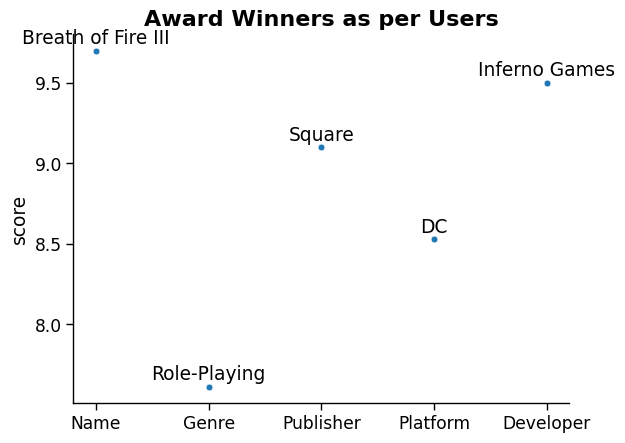

In [48]:
# Game with highest critic score
game_h_user= data2.groupby("Name")['User_Score'].mean().reset_index(name='score').nlargest(1,'score')

# Genre with highest critic score
genre_h_user= data2.groupby("Genre")['User_Score'].mean().reset_index(name='score').nlargest(1,'score')

# Publisher with highest critic score
publisher_h_user= data2.groupby("Publisher")['User_Score'].mean().reset_index(name='score').nlargest(1,'score')

# Platform with highest critic score
platform_h_user= data2.groupby("Platform")['User_Score'].mean().reset_index(name='score').nlargest(1,'score')

# Developer with highest critic score
developer_h_user= data2.groupby("Developer")['User_Score'].mean().reset_index(name='score').nlargest(1,'score')

#Combining data
combined_user = pd.concat([game_h_user,genre_h_user,publisher_h_user,platform_h_user,developer_h_user],ignore_index=True,axis=0)

# creating list of elements for visual display
new=combined_user.drop('score',axis=1)
combined_single_column = pd.concat([new[col] for col in new.columns], ignore_index=True)
combined_single_column.dropna(inplace=True)

# Plotting the data in a diagram
sns.scatterplot(data=combined_user,x=['Name','Genre','Publisher','Platform','Developer'],y='score')

for i,(t,s) in enumerate(zip(combined_single_column.iloc,combined_user['score'])):
    plt.text(i,s+0.02,t,va='bottom',ha='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Award Winners as per Users", fontdict={'fontsize':16,'fontweight':'bold'})